In [ ]:
from google.colab import files
uploaded=files.upload()

Saving SMSSpamCollection to SMSSpamCollection


In [ ]:
import io
import pandas as pd
import numpy as np
import nltk

In [ ]:
df = pd.read_csv('SMSSpamCollection', sep='\t',names=['label','text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
word = "You have received 20000$ in your bank account"

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
word_tokenize(word)

['You', 'have', 'received', '20000', '$', 'in', 'your', 'bank', 'account']

In [ ]:
from nltk.corpus import stopwords

In [ ]:
swords = stopwords.words("english")

In [ ]:
cleantext = [word for word in word_tokenize(word) if word not in swords]
cleantext

['You', 'received', '20000', '$', 'bank', 'account']

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [ ]:
clean = [ps.stem(word) for word in word_tokenize(word) if word not in swords]
clean

['you', 'receiv', '20000', '$', 'bank', 'account']

In [ ]:
word1 = 'Machine learing is easy'

In [ ]:
def clean_text(word1):
  tokens = word_tokenize(word1)
  clean = [word for word in tokens if word.isdigit() or word.isalpha()]
  clean1 = [ps.stem(word) for word in clean if word not in swords]
  return clean1

In [ ]:
clean_text(word1)

['machin', 'lear', 'easi']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(analyzer=clean_text)

In [ ]:
x = df['text']
y = df['label']

In [ ]:
x_new = tfidf.fit_transform(x)
x_new.shape

(5572, 6513)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.20, random_state=1)

In [ ]:
print(f"Size of splitted data:")
print(f"x_train {x_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data:
x_train (4457, 6513)
x_test (1115, 6513)
y_train (4457,)
y_test (1115,)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(x_train.toarray(), y_train)
y_pred_nb = nb.predict(x_test.toarray())

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

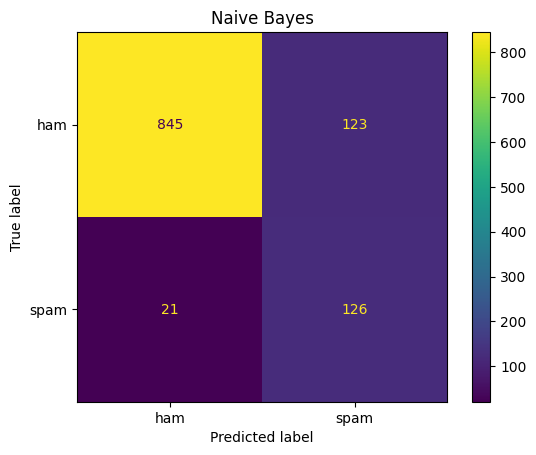

Accuracy: 0.8708520179372198
              precision    recall  f1-score   support

         ham       0.98      0.87      0.92       968
        spam       0.51      0.86      0.64       147

    accuracy                           0.87      1115
   macro avg       0.74      0.87      0.78      1115
weighted avg       0.91      0.87      0.88      1115



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb)
plt.title('Naive Bayes')
plt.show()
print(f"Accuracy: {accuracy_score(y_test,y_pred_nb)}")
print(classification_report(y_test,y_pred_nb))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

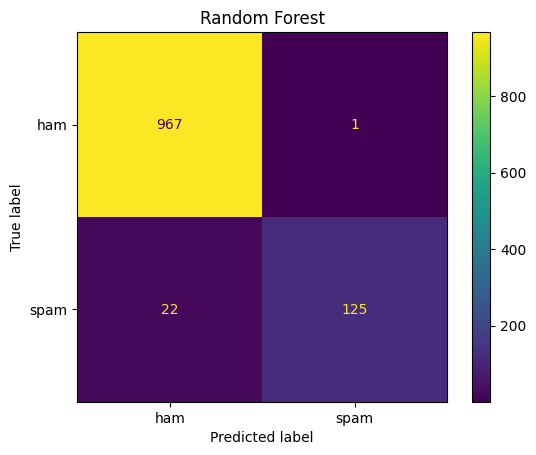

 Accuracy is 0.979372197309417
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       0.99      0.85      0.92       147

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)
plt.title('Random Forest')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")
print(classification_report(y_test,y_pred_rf))

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(random_state=1)
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)

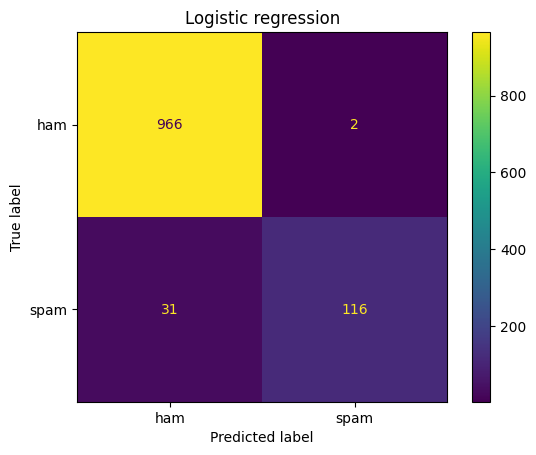

 Accuracy is 0.9704035874439462
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       968
        spam       0.98      0.79      0.88       147

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)
plt.title('Logistic regression')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")
print(classification_report(y_test,y_pred_lr))

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
para = {
    'criterion':['gini', 'entropy','log_loss'],
    'class_weight':['balanced','balanced_subsample']
}

In [ ]:
grid = GridSearchCV(model_rf, param_grid=para, cv=5, scoring='accuracy')

In [ ]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss']},
             scoring='accuracy')

In [ ]:
rf = grid.best_estimator_

In [ ]:
y_pred_grid = rf.predict(x_test)

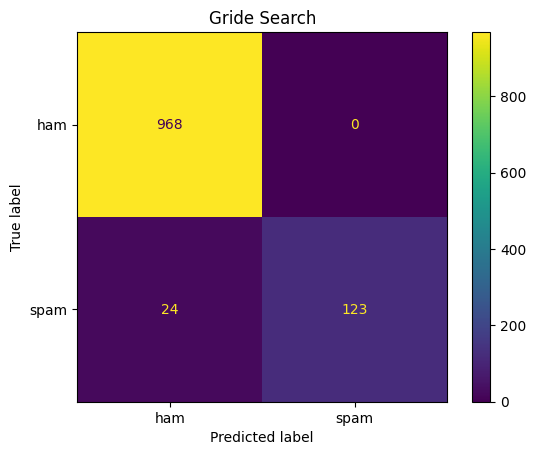

 Accuracy is 0.97847533632287
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       968
        spam       1.00      0.84      0.91       147

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_grid)
plt.title('Gride Search')
plt.show()
print(f" Accuracy is {accuracy_score(y_test,y_pred_grid)}")
print(classification_report(y_test,y_pred_grid))